
--- SHAPE ---
(891, 12)

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- DESCRIBE ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642

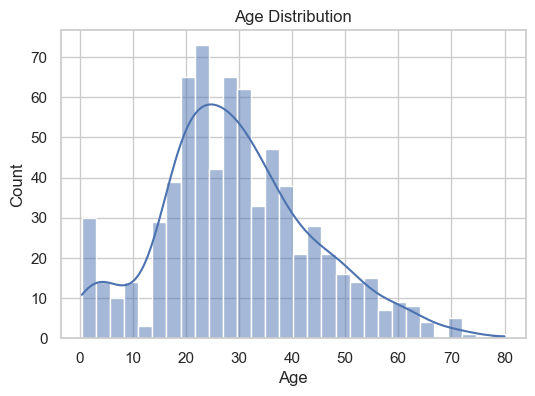

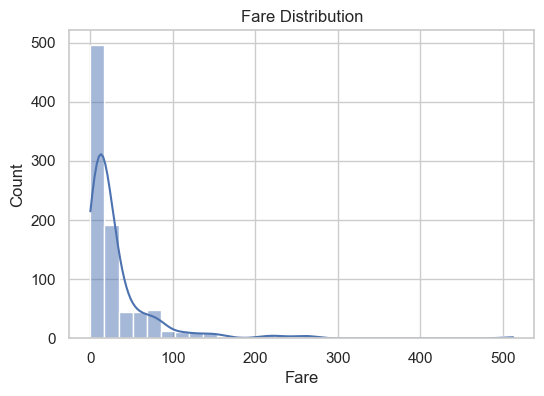

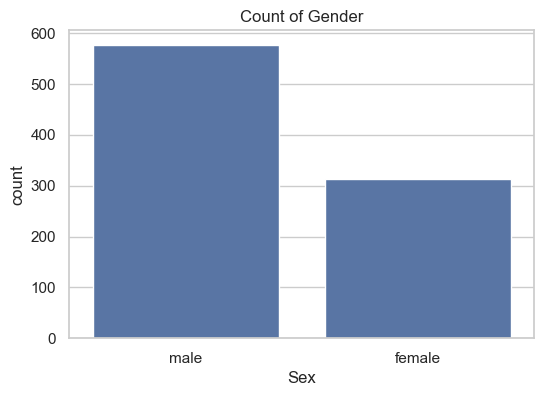

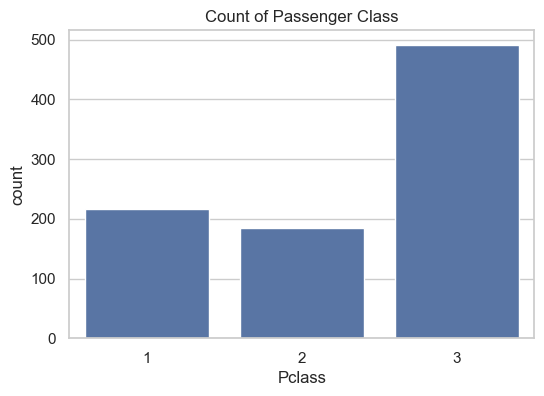

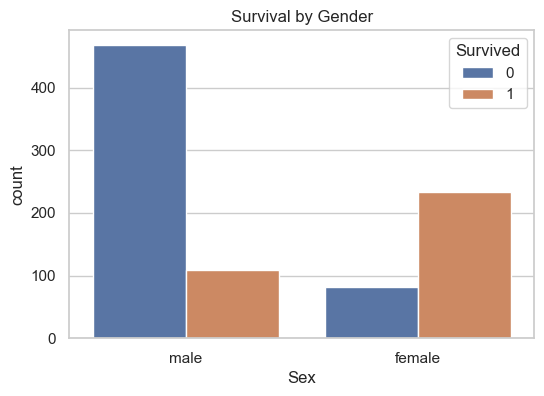

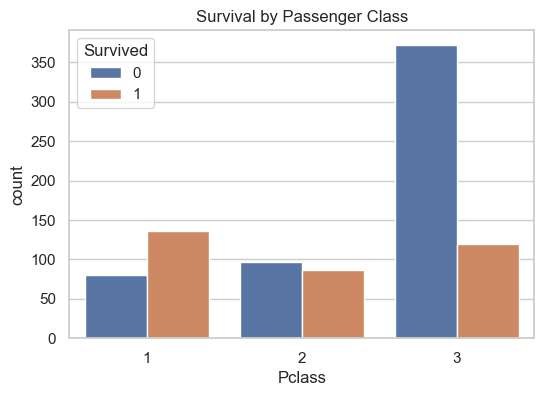

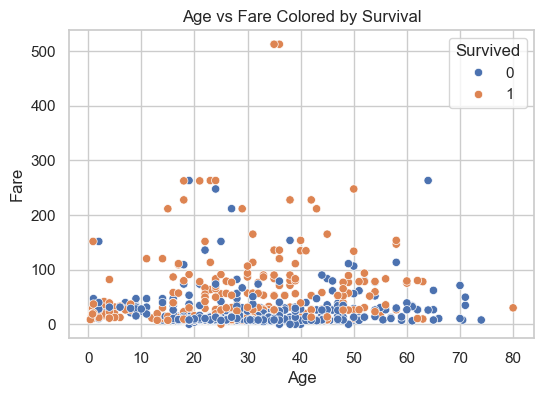

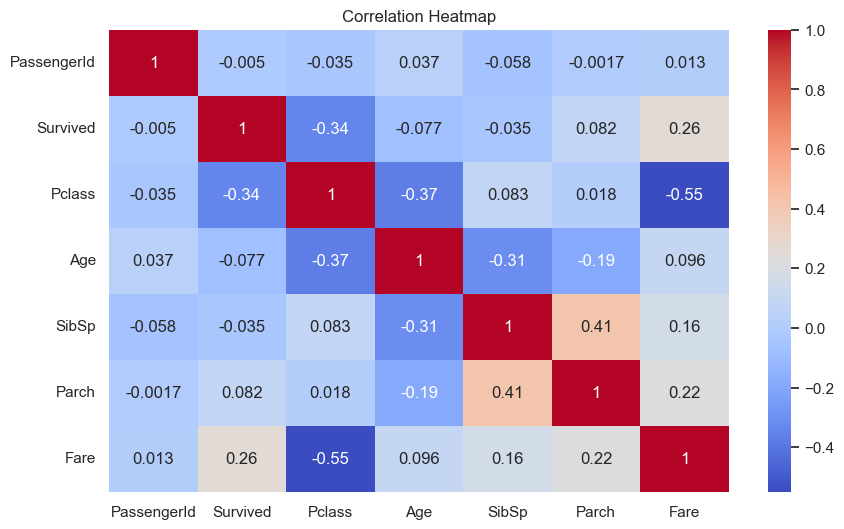


--- MISSING VALUES AFTER CLEANING ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


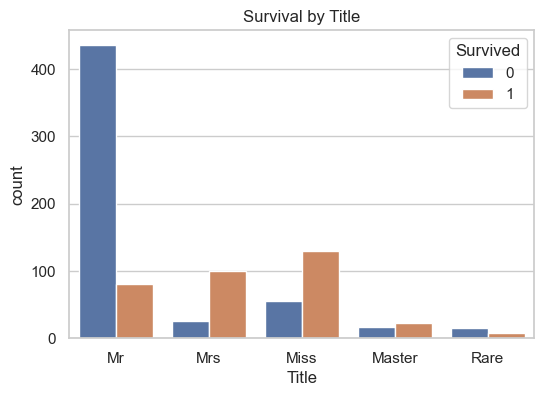

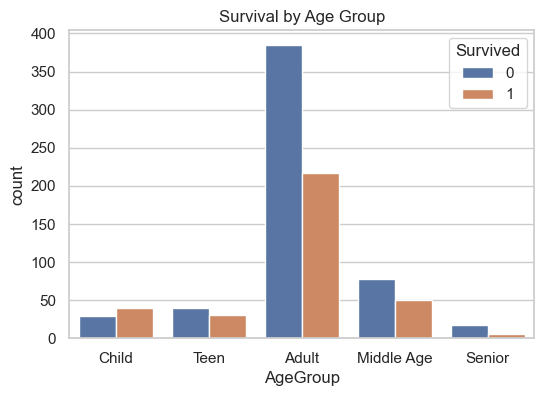


--- FINAL DATASET HEAD ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked Title AgeGroup  
0      0         A/5 21171   7.2500        S    Mr    Adult  
1      0          PC 17599  71.2833        C   Mrs    Adult  
2      0  STON/O2. 3101282   7.9250        S  Miss    Adult  
3      0            113803  53.1000        S

In [9]:
# STEP 1: Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# STEP 2: Load Dataset

df = pd.read_csv("Titanic-Dataset.csv")   # put your file name here
df.head()

# STEP 3: Basic Information

print("\n--- SHAPE ---")
print(df.shape)

print("\n--- INFO ---")
print(df.info())

print("\n--- DESCRIBE ---")
print(df.describe())

print("\n--- MISSING VALUES ---")
print(df.isnull().sum())


# STEP 4: Univariate Analysis

# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# Fare Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Fare'].dropna(), kde=True, bins=30)
plt.title("Fare Distribution")
plt.show()

# Count of Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title("Count of Gender")
plt.show()

# Count of Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title("Count of Passenger Class")
plt.show()

# STEP 5: Bivariate Analysis

# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Age vs Fare
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare Colored by Survival")
plt.show()

# STEP 6: Correlation Analysis

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# STEP 7: Handle Missing Values

# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing values)
df = df.drop(columns=['Cabin'])

# Ticket is not useful for EDA — optional drop
# df = df.drop(columns=['Ticket'])

print("\n--- MISSING VALUES AFTER CLEANING ---")
print(df.isnull().sum())

# STEP 8: Feature Engineering


# Extract Title from Name
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Group rare titles
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')

rare_titles = ['Dr','Rev','Col','Major','Lady','Sir','Countess','Jonkheer','Don','Capt']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Plot survival by Title
plt.figure(figsize=(6,4))
sns.countplot(x='Title', hue='Survived', data=df)
plt.title("Survival by Title")
plt.show()

# STEP 9: Age Grouping

df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,40,60,80],
                        labels=['Child','Teen','Adult','Middle Age','Senior'])

plt.figure(figsize=(6,4))
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title("Survival by Age Group")
plt.show()

print("\n--- FINAL DATASET HEAD ---")
print(df.head())

print("\n--- FINAL COLUMNS ---")
print(df.columns)
